In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 



In [47]:
sg_df = pd.read_csv(r"C:\Users\SONY\Downloads\Grades (1).csv")
sg_df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [48]:
sg_df.shape

(571, 43)

In [49]:
sg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [50]:
sg_df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [51]:
sg_df['MT-224'].unique()


array(['B-', 'D+', 'A', 'D', 'A-', 'C-', 'C', 'B+', 'C+', 'B', nan, 'A+',
       'WU', 'W', 'F'], dtype=object)

In [52]:
sg_df['CS-107'].unique()


array(['C-', 'B+', 'B-', 'D', 'C', 'A-', 'C+', 'D+', 'B', 'A', nan, 'A+',
       'I', 'WU', 'F'], dtype=object)

In [53]:
sg_df.replace(to_replace="WU",
           value="W",inplace=True)


In [54]:
sg_df.replace({'A+':0,'A':1,'A-':2,'B+':3,'B':4,'B-':5,'C+':6,'C':7,'C-':8,'D+':9,'D':10,'F':11,'W':12,'I':13},inplace = True)

In [55]:
sg_df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,5,9,8.0,7.0,8.0,9,10.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,1.0,8.0,4.0,2.0,2.205
1,CS-97002,1,10,9.0,10.0,5.0,7,10.0,1.0,9.0,...,9.0,10.0,7.0,10.0,2.0,5.0,7.0,7.0,4.0,2.008
2,CS-97003,1,4,1.0,5.0,3.0,1,5.0,3.0,2.0,...,4.0,4.0,1.0,7.0,1.0,1.0,1.0,2.0,1.0,3.608
3,CS-97004,10,6,9.0,10.0,10.0,2,9.0,8.0,10.0,...,9.0,7.0,9.0,8.0,5.0,4.0,6.0,6.0,6.0,1.906
4,CS-97005,2,2,2.0,3.0,1.0,1,2.0,3.0,1.0,...,5.0,3.0,3.0,5.0,2.0,1.0,2.0,2.0,1.0,3.448


In [56]:
sg_df.fillna(sg_df.mode().iloc[0], inplace=True)


In [57]:
sg_df.isnull().sum()


Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [58]:
features = sg_df.drop(columns = ['CGPA','Seat No.'],axis=1)
labels = sg_df['CGPA']
X = features
Y = labels


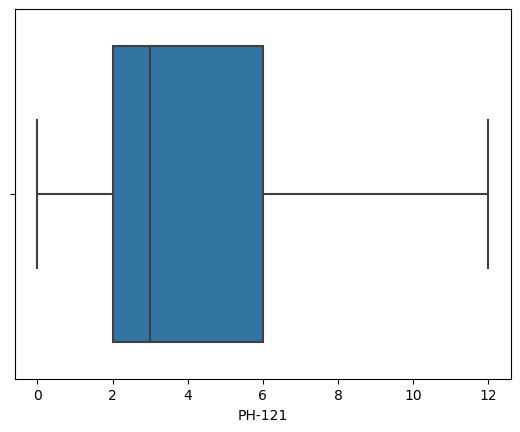

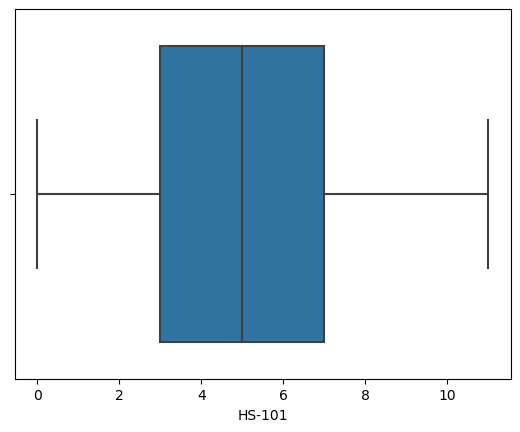

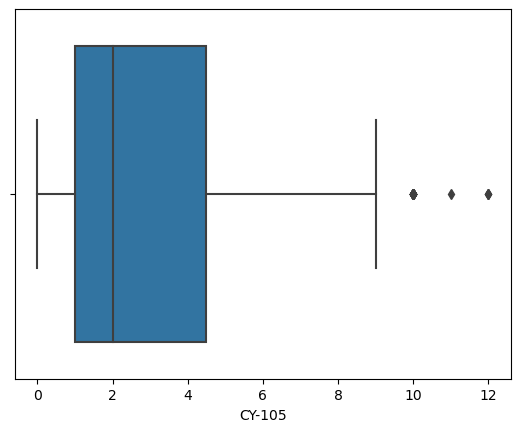

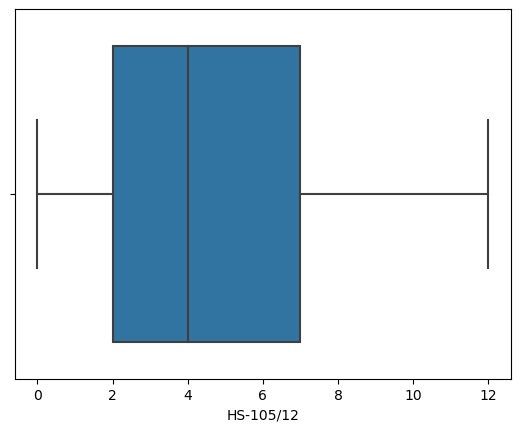

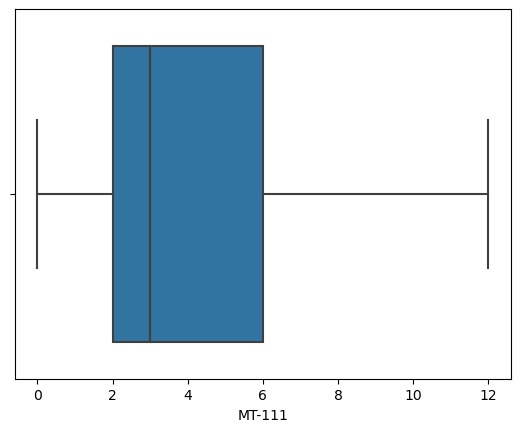

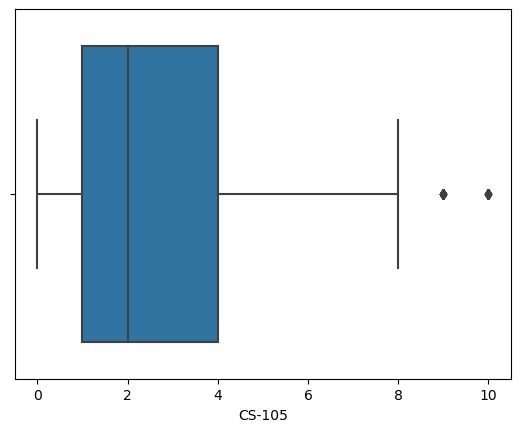

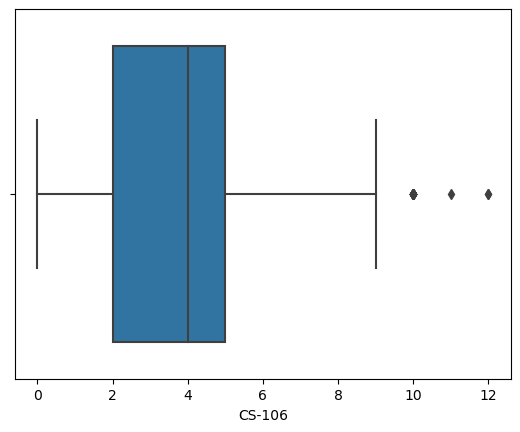

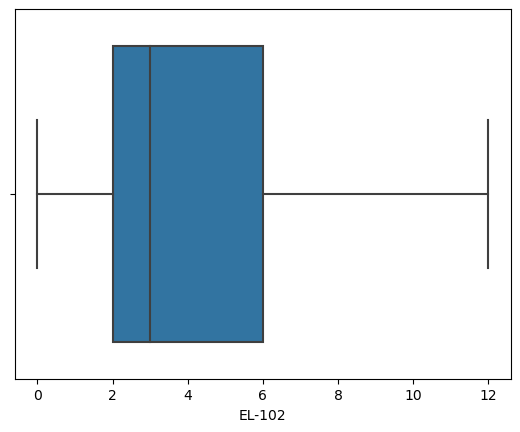

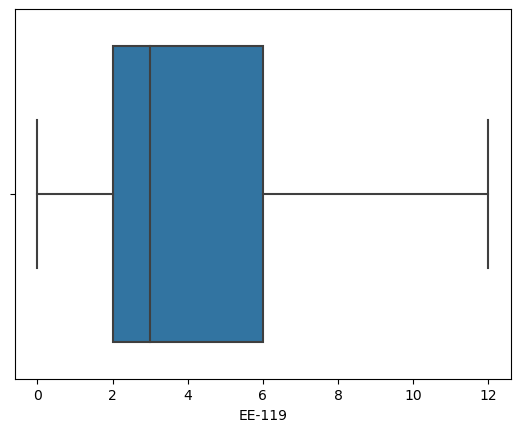

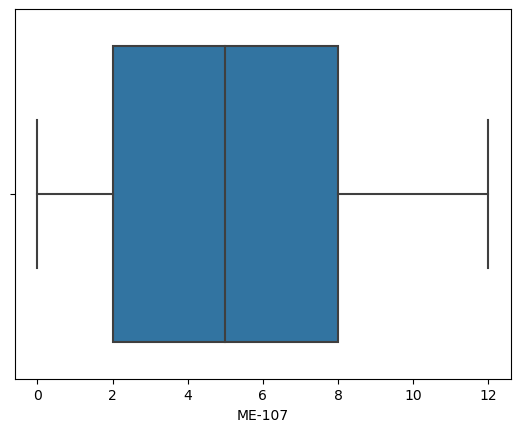

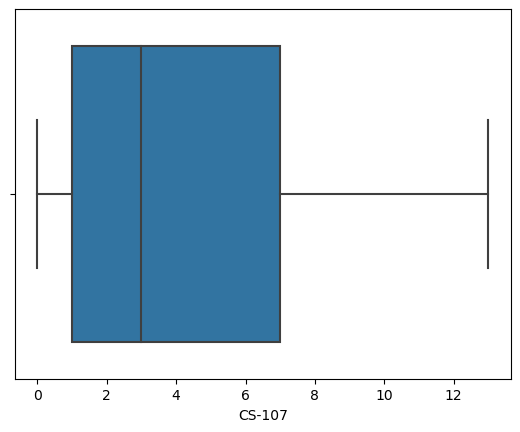

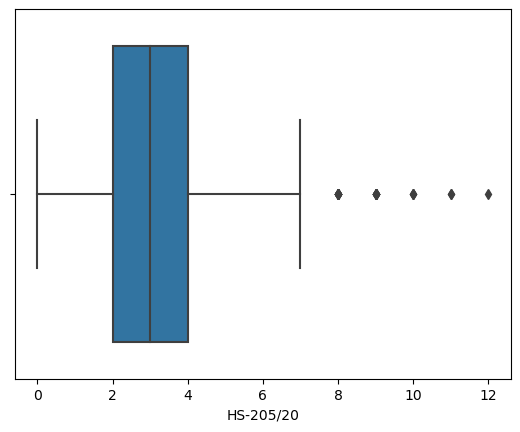

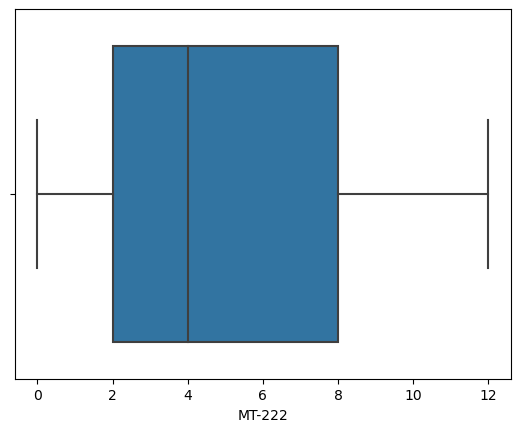

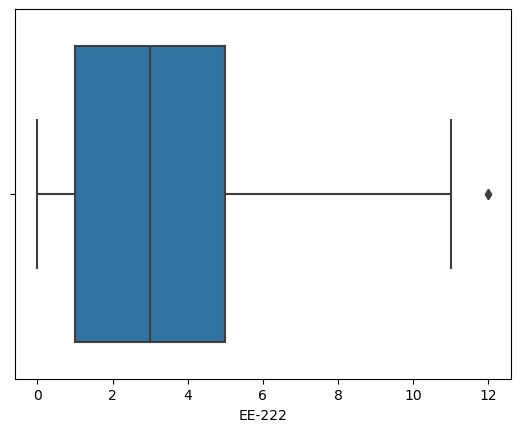

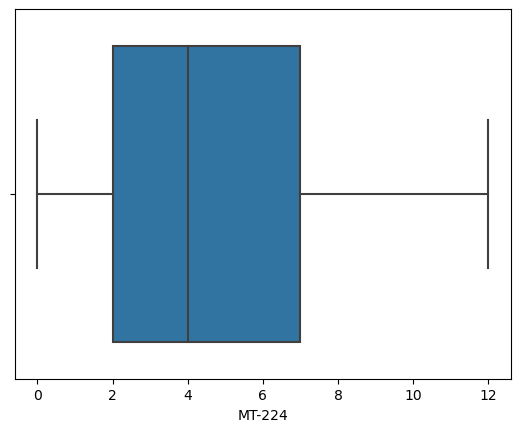

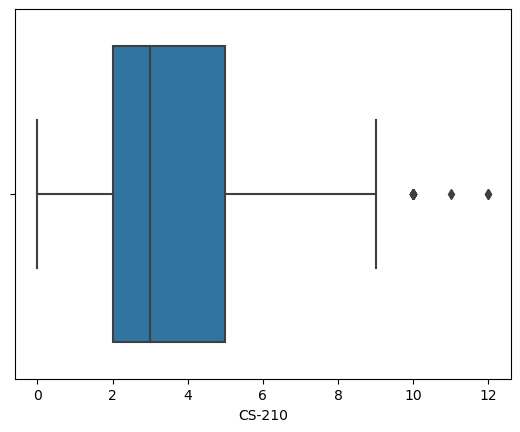

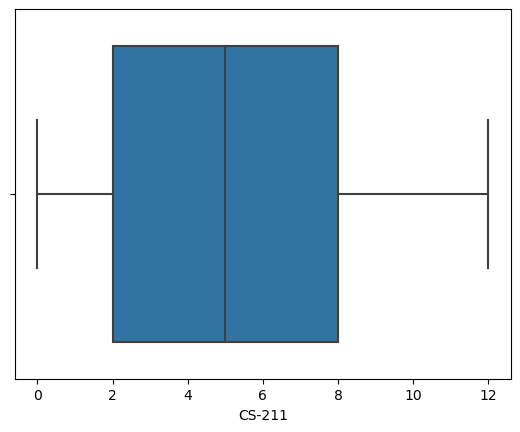

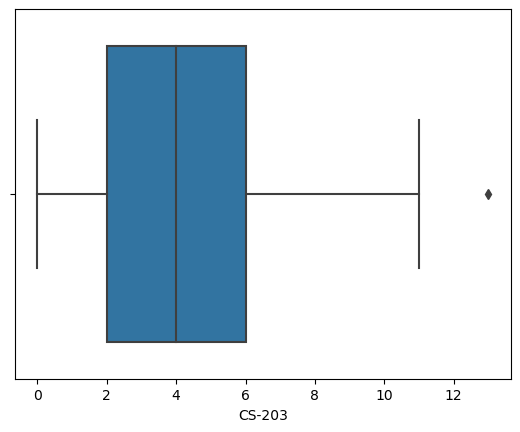

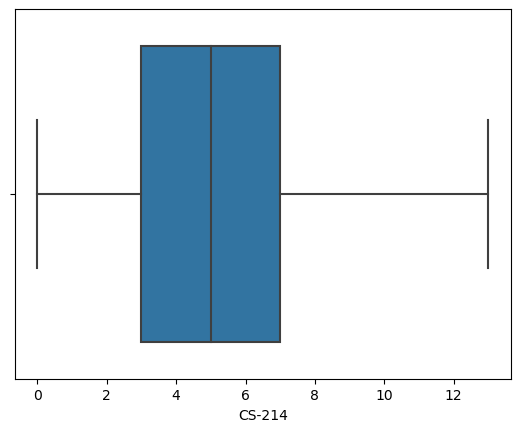

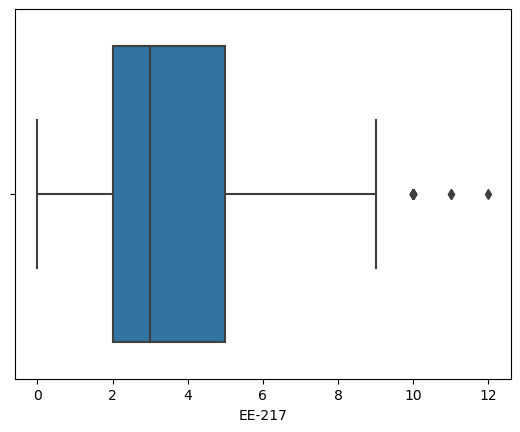

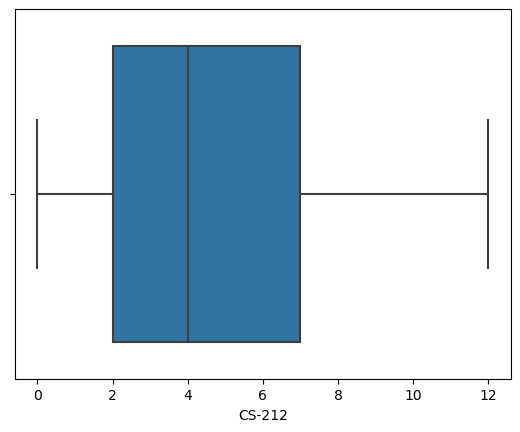

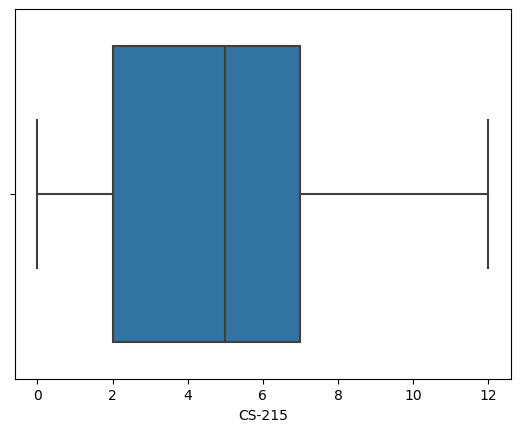

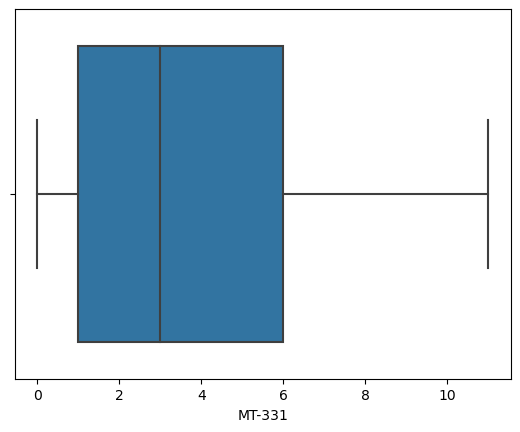

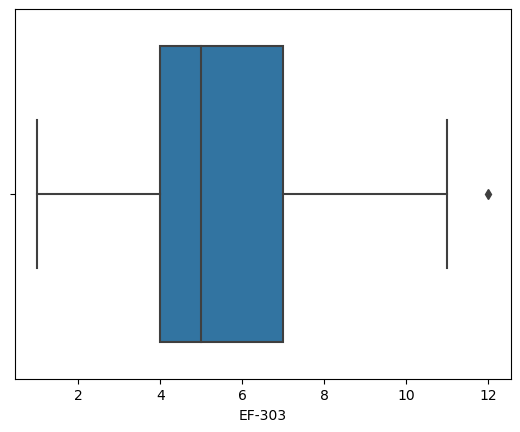

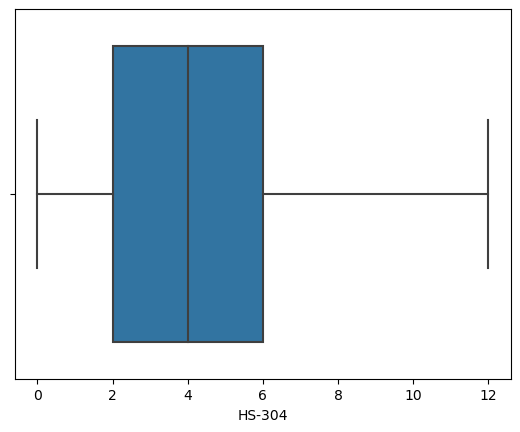

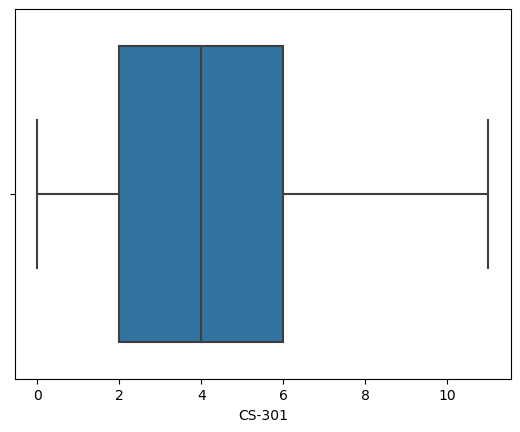

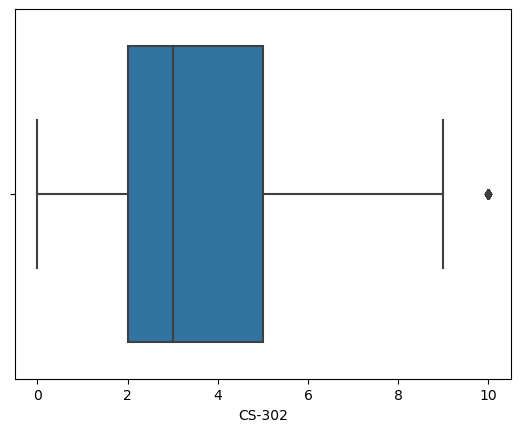

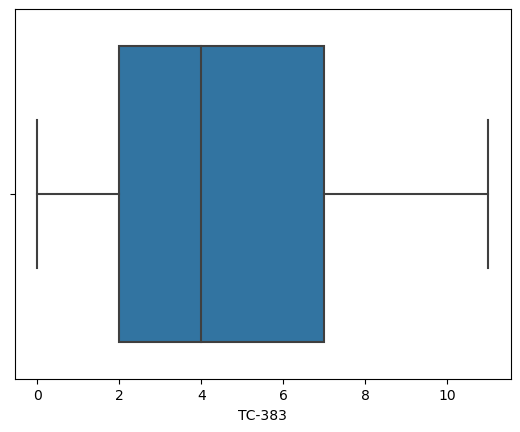

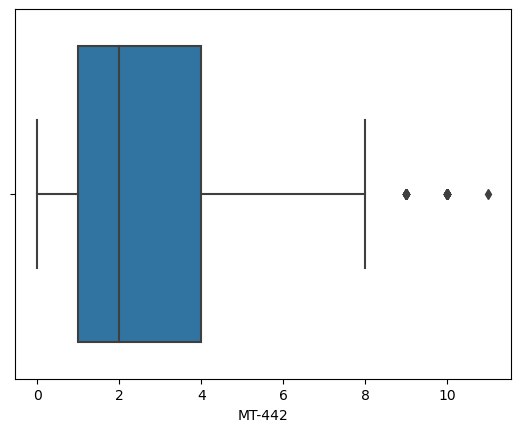

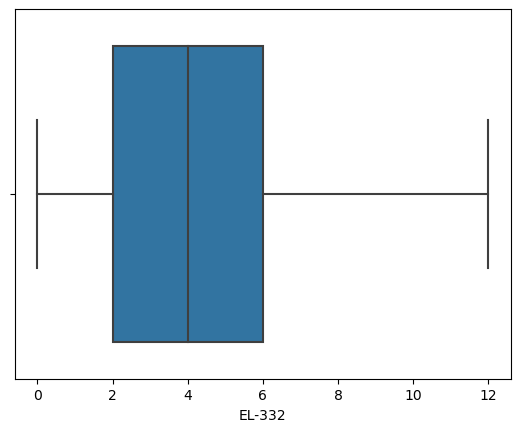

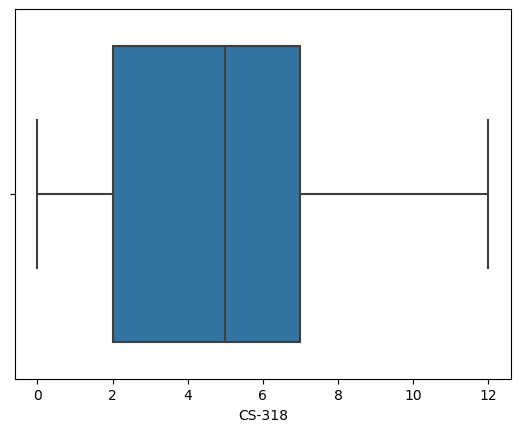

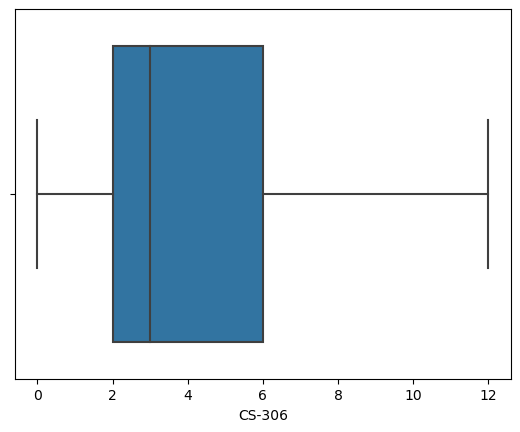

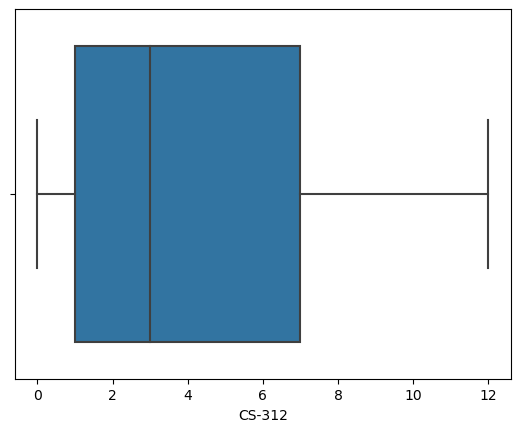

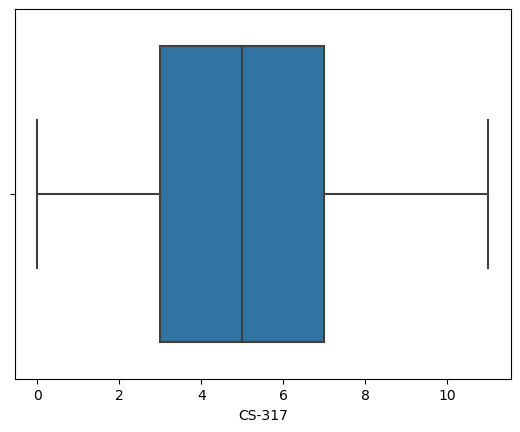

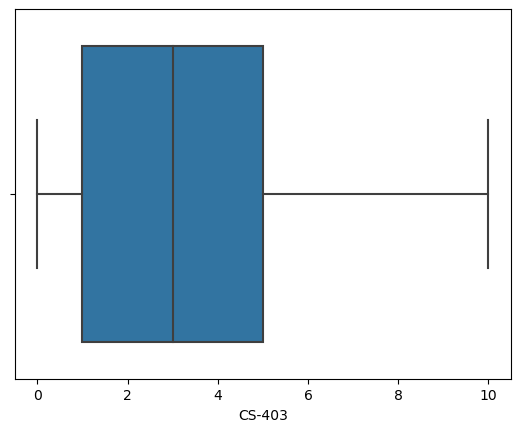

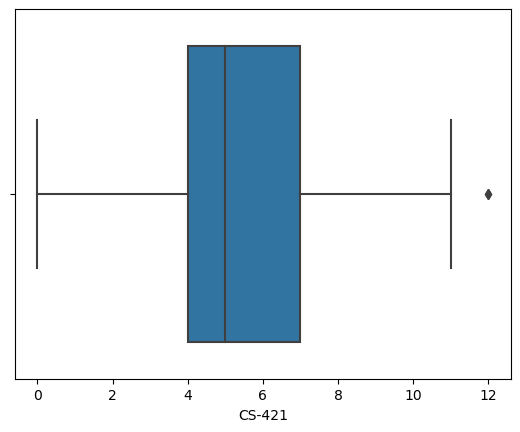

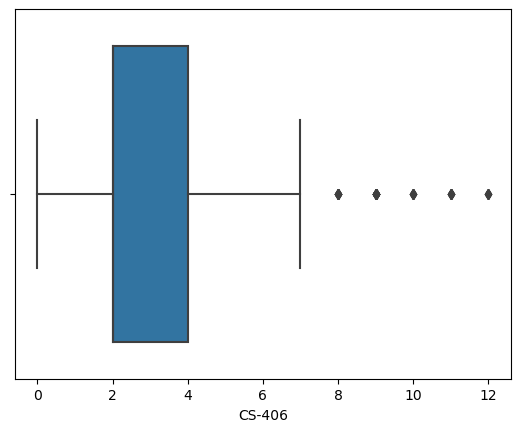

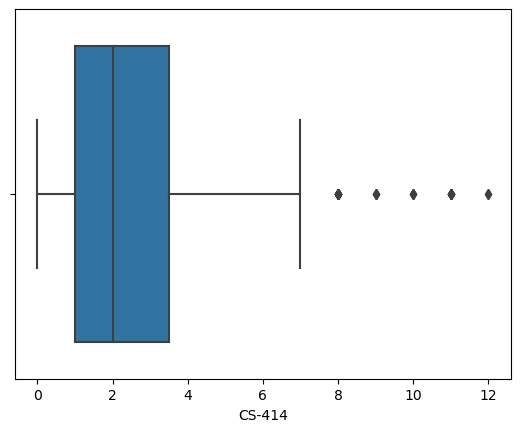

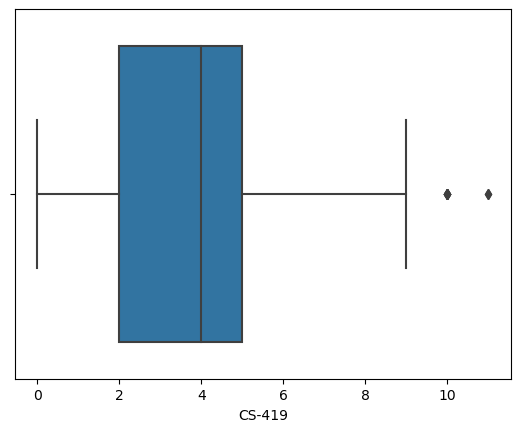

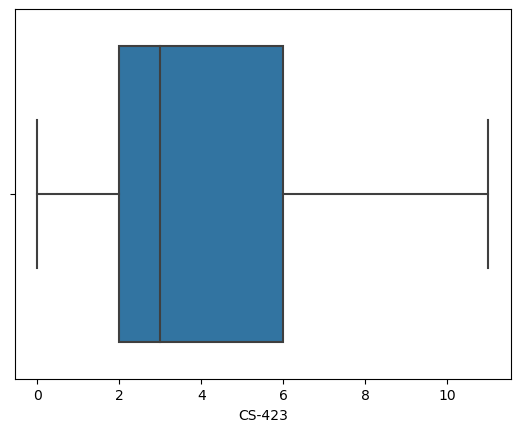

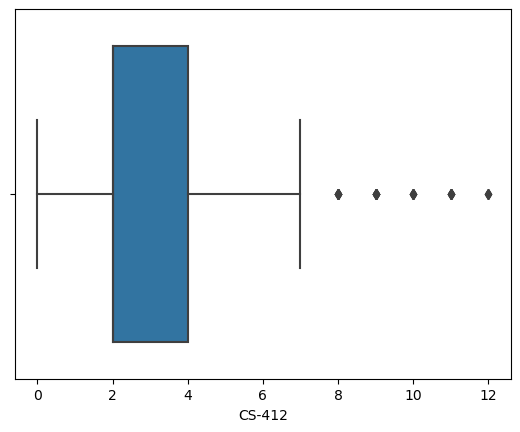

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

x2 = X.values
features = X.columns  # Assuming X is your DataFrame

for i in range(1, 42):
    sns.boxplot(x2[:, i-1])  # Select the i-th column
    plt.xlabel(features[i-1])
    plt.show()





In [60]:
sg_df.describe()





,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.971979,5.190893,3.187391,4.352014,4.022767,3.005254,4.155867,4.070053,3.977233,4.922942,...,3.992995,4.922942,3.593695,5.478109,3.075306,2.676007,3.936953,4.073555,3.136602,2.954888
std,2.947360,2.724223,2.808180,3.107502,2.842258,2.500872,2.549554,2.945469,2.479638,3.051203,...,3.310264,2.574030,2.621014,2.569892,2.275638,2.237269,2.203558,2.601252,2.151028,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,3.500000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,11.000000,10.000000,12.000000,12.000000,12.000000,11.000000,11.000000,12.000000,3.985000


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 2)

In [62]:
Lr = LinearRegression()



In [63]:
Lr.fit(X_train,Y_train)



LinearRegression()

In [85]:

print('Coefficients: ', Lr.coef_)

 


Coefficients:  [-0.02210405 -0.01352865 -0.02679022 -0.01015127 -0.00529153 -0.0282237
 -0.01966332 -0.01363351 -0.01130256 -0.01481107 -0.00520986 -0.00907959
  0.00133786  0.00542441 -0.0046119  -0.0139163  -0.00804614 -0.00275325
 -0.0186595  -0.00262969  0.00235381 -0.01087541 -0.00947404 -0.00302114
  0.01174414 -0.01310455 -0.0064142  -0.00370522 -0.0035701  -0.01513342
  0.00476273 -0.00384096  0.00384698 -0.01936574  0.00430441 -0.00551699
 -0.00970201 -0.01193585  0.01060697 -0.01678551 -0.00937591]


In [87]:
print('Variance score: {}'.format(Lr.score(X_test, Y_test)))

Variance score: 0.9522244346414049
